# **The Sparks Foundation**

> **Task-1 : Predict the percentage of an student based on the no. of study hours.**
*   This is a simple linear regression task as it involves just 2 variables.
*   We can use R, Python, SAS Enterprise Miner or any other tool.

> **Our Task : What will be predicted score if a student studies for 9.25 hrs/ day?**


# **Author - Palnati Ramakrishna**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the Data 
student_data = pd.read_csv('http://bit.ly/w-data')
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in the Dataset
student_data.isnull == True

# If this return True value as output, then we can know that there are null values in the Dataset
# If this return False, then we can proceed for next steps

False

**There is no null value in the Dataset.**

# **Data Visualization**

**scatter plot**

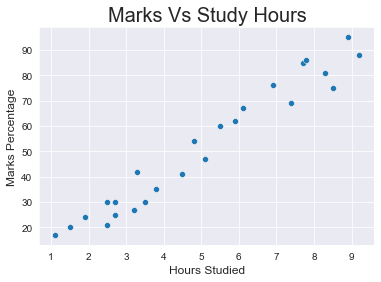

In [4]:
sns.set_style('darkgrid')
sns.scatterplot(y= student_data['Scores'], x= student_data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

   **Regression Plot**

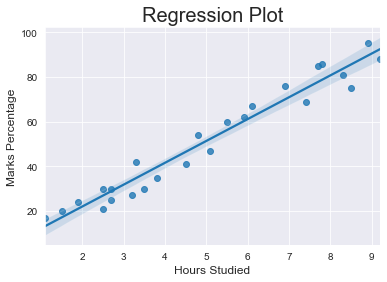

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x= student_data['Hours'], y= student_data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


print(student_data.corr())

**It is confirmed that the variables are positively correlated.**

# **Training the Model**

**1) Splitting the data**

In [15]:
# Defining X and y from the Data
X = student_data.iloc[:, :-1].values  
Y = student_data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)

**2) Fitting the Data into the model**

In [16]:
regression = LinearRegression()
regression.fit(train_X, train_Y)
print("---------Model Trained---------")

---------Model Trained---------


# **Predicting the Percentage of Marks**

In [17]:
pred_Y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_Y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**Comparing the Predicted Marks with the Actual Marks**

In [18]:
compare_scores = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': pred_Y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Visually Comparing the Predicted Marks with the Actual Marks**

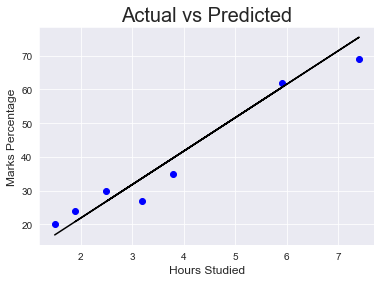

In [19]:
plt.scatter(x=val_X, y=val_Y, color='blue')
plt.plot(val_X, pred_Y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# **Evaluating the Model**

In [20]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

In [24]:
print("Mean squared error: %.2f" % np.mean((regression.predict(val_X) - val_Y)**2))

Mean squared error: 20.33


In [25]:
print('Variance score: %.2f' % regression.score(val_X, val_Y))

Variance score: 0.94


**The value of Variance score is also high.so the chance of getting error is somewhat less**

# **What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [27]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# **Conclusion:**

**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**